# Retrasos

Uno de los elemento no lineales más habituales en los procesos
alimentarios es la existencia de retrasos. En el capítulo 7 se estudiará
su influencia en el control de procesos.

Sea el siguiente proceso de primer orden con un retraso:

```{figure} ./img/0.png
---
name: retraso-1
figclass: margin
align: left
---
Diagrama de bloques de un proceso de primer orden con un retraso igual a $t_d$.
```

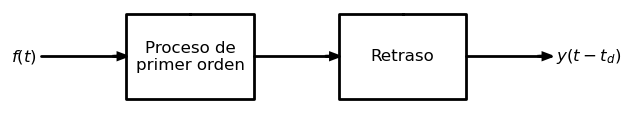

In [2]:
using PyCall, LaTeXStrings

schemdraw = pyimport("schemdraw")
dsp = pyimport("schemdraw.dsp")

d = schemdraw.Drawing(unit=2, fontsize=12)

d.add(dsp.Arrow().right().label(L"f(t)", "left"))
proc = d.add(dsp.Box().anchor("W").label("Proceso de\nprimer orden"))
d.add(dsp.Arrow().right().at(proc.E))
retraso = d.add(dsp.Box().anchor("W").label("Retraso"))
d.add(dsp.Arrow().right().label(L"y(t-t_d)", "right").at(retraso.E))

d.draw(show=false)

Para el sistema de primer orden:

$$G_p = \frac{\mathcal{L} [y (t)]}{\mathcal{L} [f (t)]} = \frac{K_p}{\tau_p s
   + 1}$$ 
   
y para el retraso (ec. {eq}`translacion`, propiedad _translación de la transformada_, {ref}`transformada`):

$$\frac{\mathcal{L} [y (t - t_d)]}{\mathcal{L} [y (t)]} = \mathrm{e}^{- t_d s}$$

donde $t_d$ es el retraso o tiempo muerto.

Por tanto el proceso puede representarse como:

```{figure} ./img/0.png
---
name: retraso-2
figclass: margin
align: left
---
Diagrama de bloques de la figura anterior una vez realizadas las transformadas de Laplace.
```

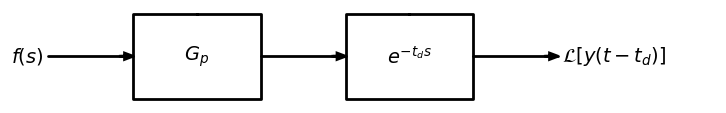

In [3]:
d = schemdraw.Drawing(unit=2, fontsize=14)

d.add(dsp.Arrow().right().label(L"f(s)", "left"))
proc = d.add(dsp.Box().anchor("W").label(L"G_p"))
d.add(dsp.Arrow().right().at(proc.E))
retraso = d.add(dsp.Box().anchor("W").label(L"e^{-t_d s}"))
d.add(dsp.Arrow().right().label(L"\mathcal{L}[y(t-t_d)]", "right").at(retraso.E))

d.draw(show=false)

La función de transferencia global para el proceso de primer orden y el
retraso será:

$$\frac{\mathcal{L} [y (t - t_d)]}{\mathcal{L} [f (t)]} = \frac{K_p}{\tau_p s
   + 1} \mathrm{e}^{- t_d s}$$

El cálculo de la transformada inversa de Laplace es sencillo. En este caso lo vamos a realizar utilizando Sympy. En primer lugar cargaremos las bibliotecas que vamos a utilizar, definiremos los símbolos necesarios y las funciones de transferencia del proceso ($G_p$) y del retraso ($G_d$). También calcularemos la función de transferencia $G$, resultado de plantear la serie de bloques formada por el proceso y por el retraso:

In [1]:
using SymPy, Plots, LaTeXStrings

t, td, K, T, M = symbols("t t_d K tau M", real=true)
s = symbols("s")

Gp = K/(T*s+1)
Gd = exp(-td*s)

G = Gp*Gd

   -s⋅t_d
K⋅ℯ      
─────────
 s⋅τ + 1 

La respuesta del proceso de primer orden $y(t)$ es:

In [2]:
y = sympy.inverse_laplace_transform(Gp*M/s, s, t)

    ⎛ t    ⎞  -t      
    ⎜ ─    ⎟  ───     
    ⎜ τ    ⎟   τ      
K⋅M⋅⎝ℯ  - 1⎠⋅ℯ   ⋅θ(t)

La salida tras sufrir el retraso $t_d$ es:

In [3]:
yd = sympy.inverse_laplace_transform(G*M/s, s, t)

    ⎛ t    t_d⎞  -t            
    ⎜ ─    ───⎟  ───           
    ⎜ τ     τ ⎟   τ            
K⋅M⋅⎝ℯ  - ℯ   ⎠⋅ℯ   ⋅θ(t - t_d)

El efecto del retraso es muy evidente al representar gráficamente ambas respuestas:

```{figure} ./img/0.png
---
name: primer_orden_retraso
figclass: margin
align: left
---
Efecto de un retraso $t_0 = 1$ sobre la respuesta de un sistema de primer orden con una entrada en escalón.
```

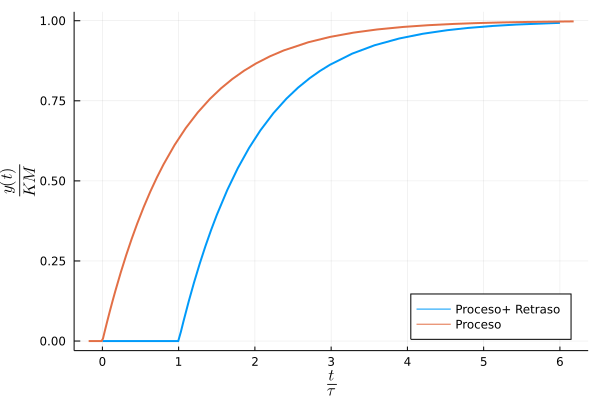

In [4]:
plot(yd(K=>1, T=>1, td=>1, M=>1), 0, 6, legend=:bottomright, 
    label="Proceso+ Retraso", xlabel=L"\frac{t}{\tau}", ylabel=L"\frac{y(t)}{K M}",
    lw=2)
plot!(y(K=>1, T=>1, M=>1), label="Proceso", lw=2)

El retraso se puede simplificar matemáticamente mediante la [aproximación
de Padé](https://es.wikipedia.org/wiki/Aproximación_de_Padé):

$$\mathrm{e}^{- t_d s} \approx \frac{1 - \frac{t_d}{2} s}{1 + \frac{t_d}{2} s}$$